<h3>The Sparks Foundation #GRIPAPRIL21</h3>

<h3>Author: Ali Ahmed Shaikh</h3>

<h4>PS: To predict scores of the students based on number of hours they studied</h4>

In [1]:
import requests
from bs4 import BeautifulSoup
URL = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [2]:
csv_string = soup.prettify()
lines = csv_string.splitlines()

In [3]:
import csv
reader = csv.reader(lines)
parsed_csv = list(reader)

In [4]:
csv_file = [parsed_csv[0]]
for line_no in range(1,len(parsed_csv)):
    row = []
    for v in parsed_csv[line_no]:
        row.append(float(v))
    csv_file.append(row)

In [5]:
from pandas import DataFrame
df = DataFrame(csv_file[1:], columns=csv_file[0])
df

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0
5,1.5,20.0
6,9.2,88.0
7,5.5,60.0
8,8.3,81.0
9,2.7,25.0


In [6]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

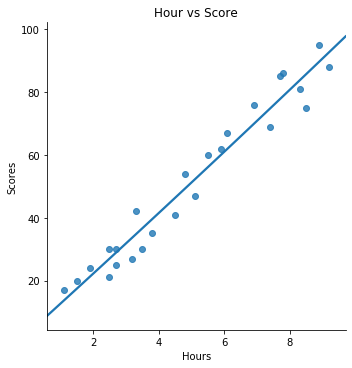

In [9]:
sns.lmplot(x='Hours',y='Scores',data=df,order=2,ci=None).set(title='Hour vs Score')

In [10]:
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [11]:
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.score(X_test, y_test)

0.9447618214393185

In [12]:
regr.predict(np.array([9.25]).reshape(-1,1))

array([[92.39926303]])